In [1]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import read_csv
from torch import cat, cos, float32, linspace, meshgrid, pi, stack, tensor
from torch.nn import Sequential, Linear, ReLU, Sigmoid, MSELoss, Module
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader

# First

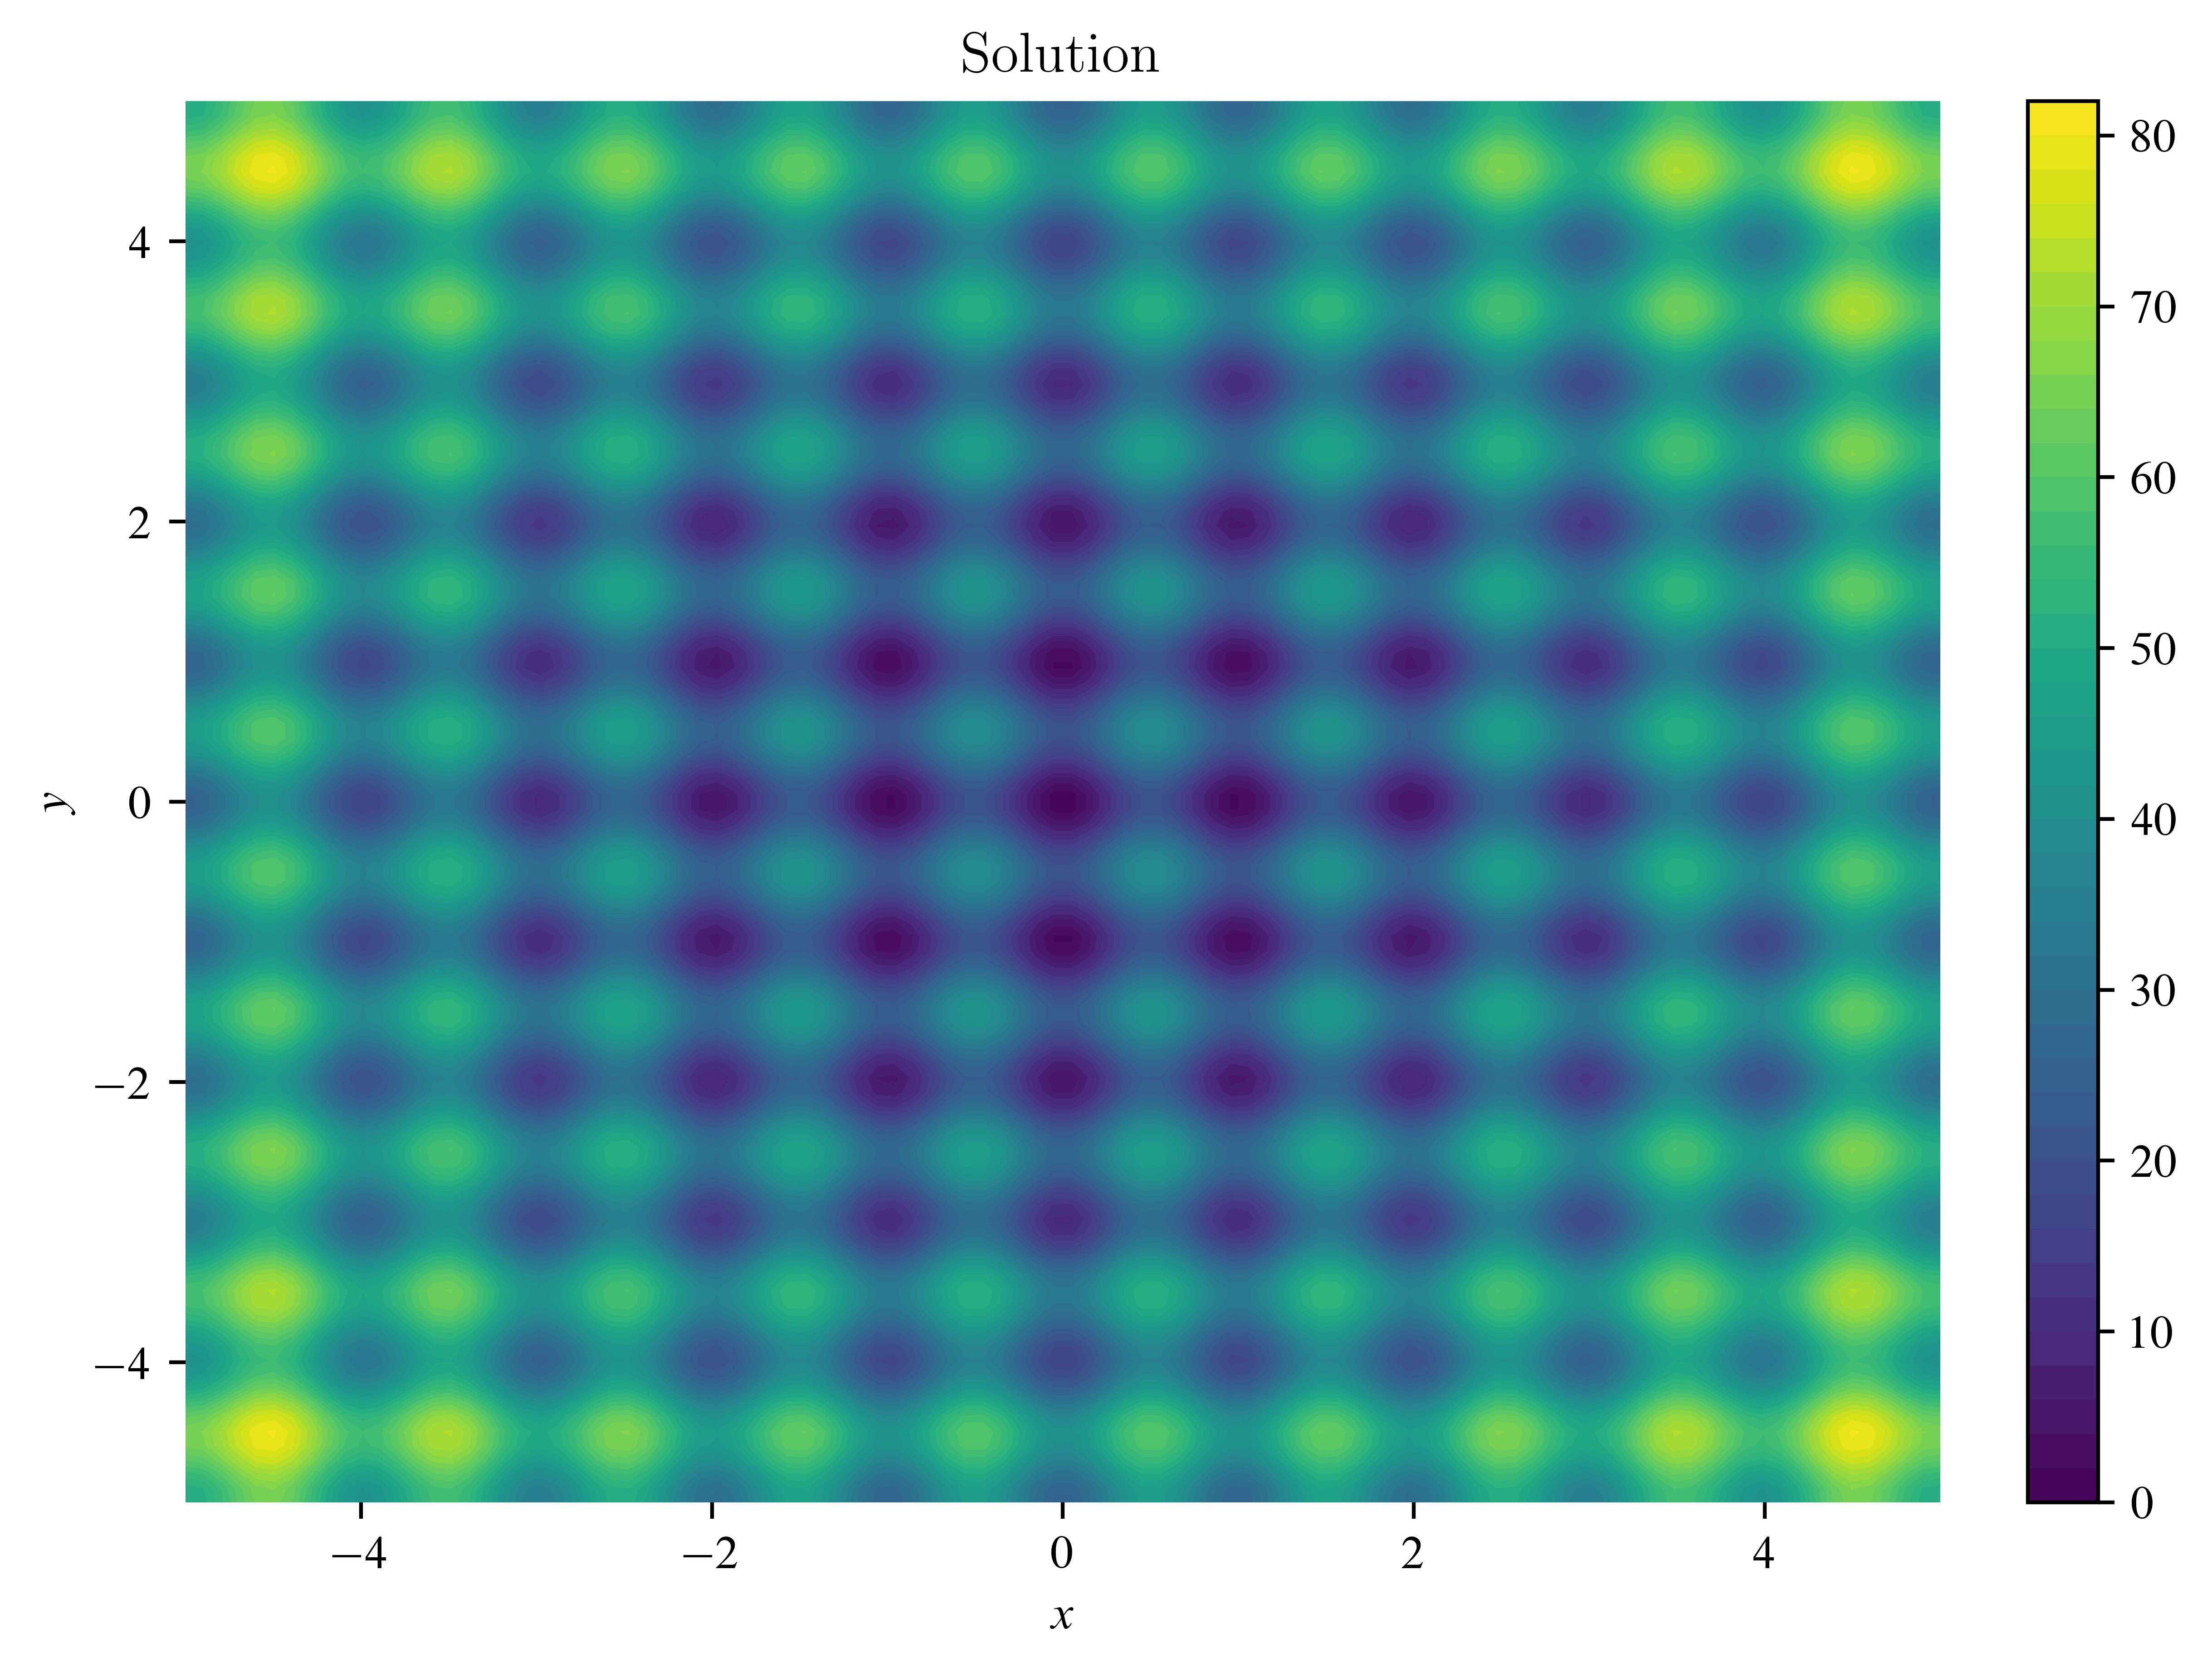

In [8]:
X, Y = meshgrid(
    linspace(start=-5, end=5, steps=100),
    linspace(start=-5, end=5, steps=100),
    indexing="xy",
)

fig: Figure
ax: Axes
with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        20
        + (X * X - 10 * cos(tensor(2 * pi) * X))
        + (Y * Y - 10 * cos(tensor(2 * pi) * Y)),
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    fig.colorbar(mappable=img)
    fig.savefig("meshplot.pdf", transparent=True, bbox_inches="tight")
    plt.show()
    fig.clf()

In [9]:
class Net(Module):
    def __init__(self):
        super().__init__()
        self.model = Sequential(
            Linear(2, 64), ReLU(), Linear(64, 64), ReLU(), Linear(64, 1)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [10]:
XTrain, YTrain = meshgrid(linspace(-3, 3, 100), linspace(-3, 3, 100), indexing="xy")
ZTrain = (
    20
    + (XTrain * XTrain - 10 * cos(tensor(2 * pi) * X))
    + (YTrain * YTrain - 10 * cos(tensor(2 * pi) * Y))
)
lossFunction = MSELoss()
net = Net()
losses = []
for _ in range(10000):
    zPred = net(cat((XTrain.reshape(-1, 1), YTrain.reshape(-1, 1)), dim=1))
    loss = lossFunction(zPred.reshape(XTrain.shape), ZTrain)
    net.zero_grad()
    loss.backward()
    for param in net.parameters():
        param.data -= 0.001 * param.grad
    losses.append(loss.data)

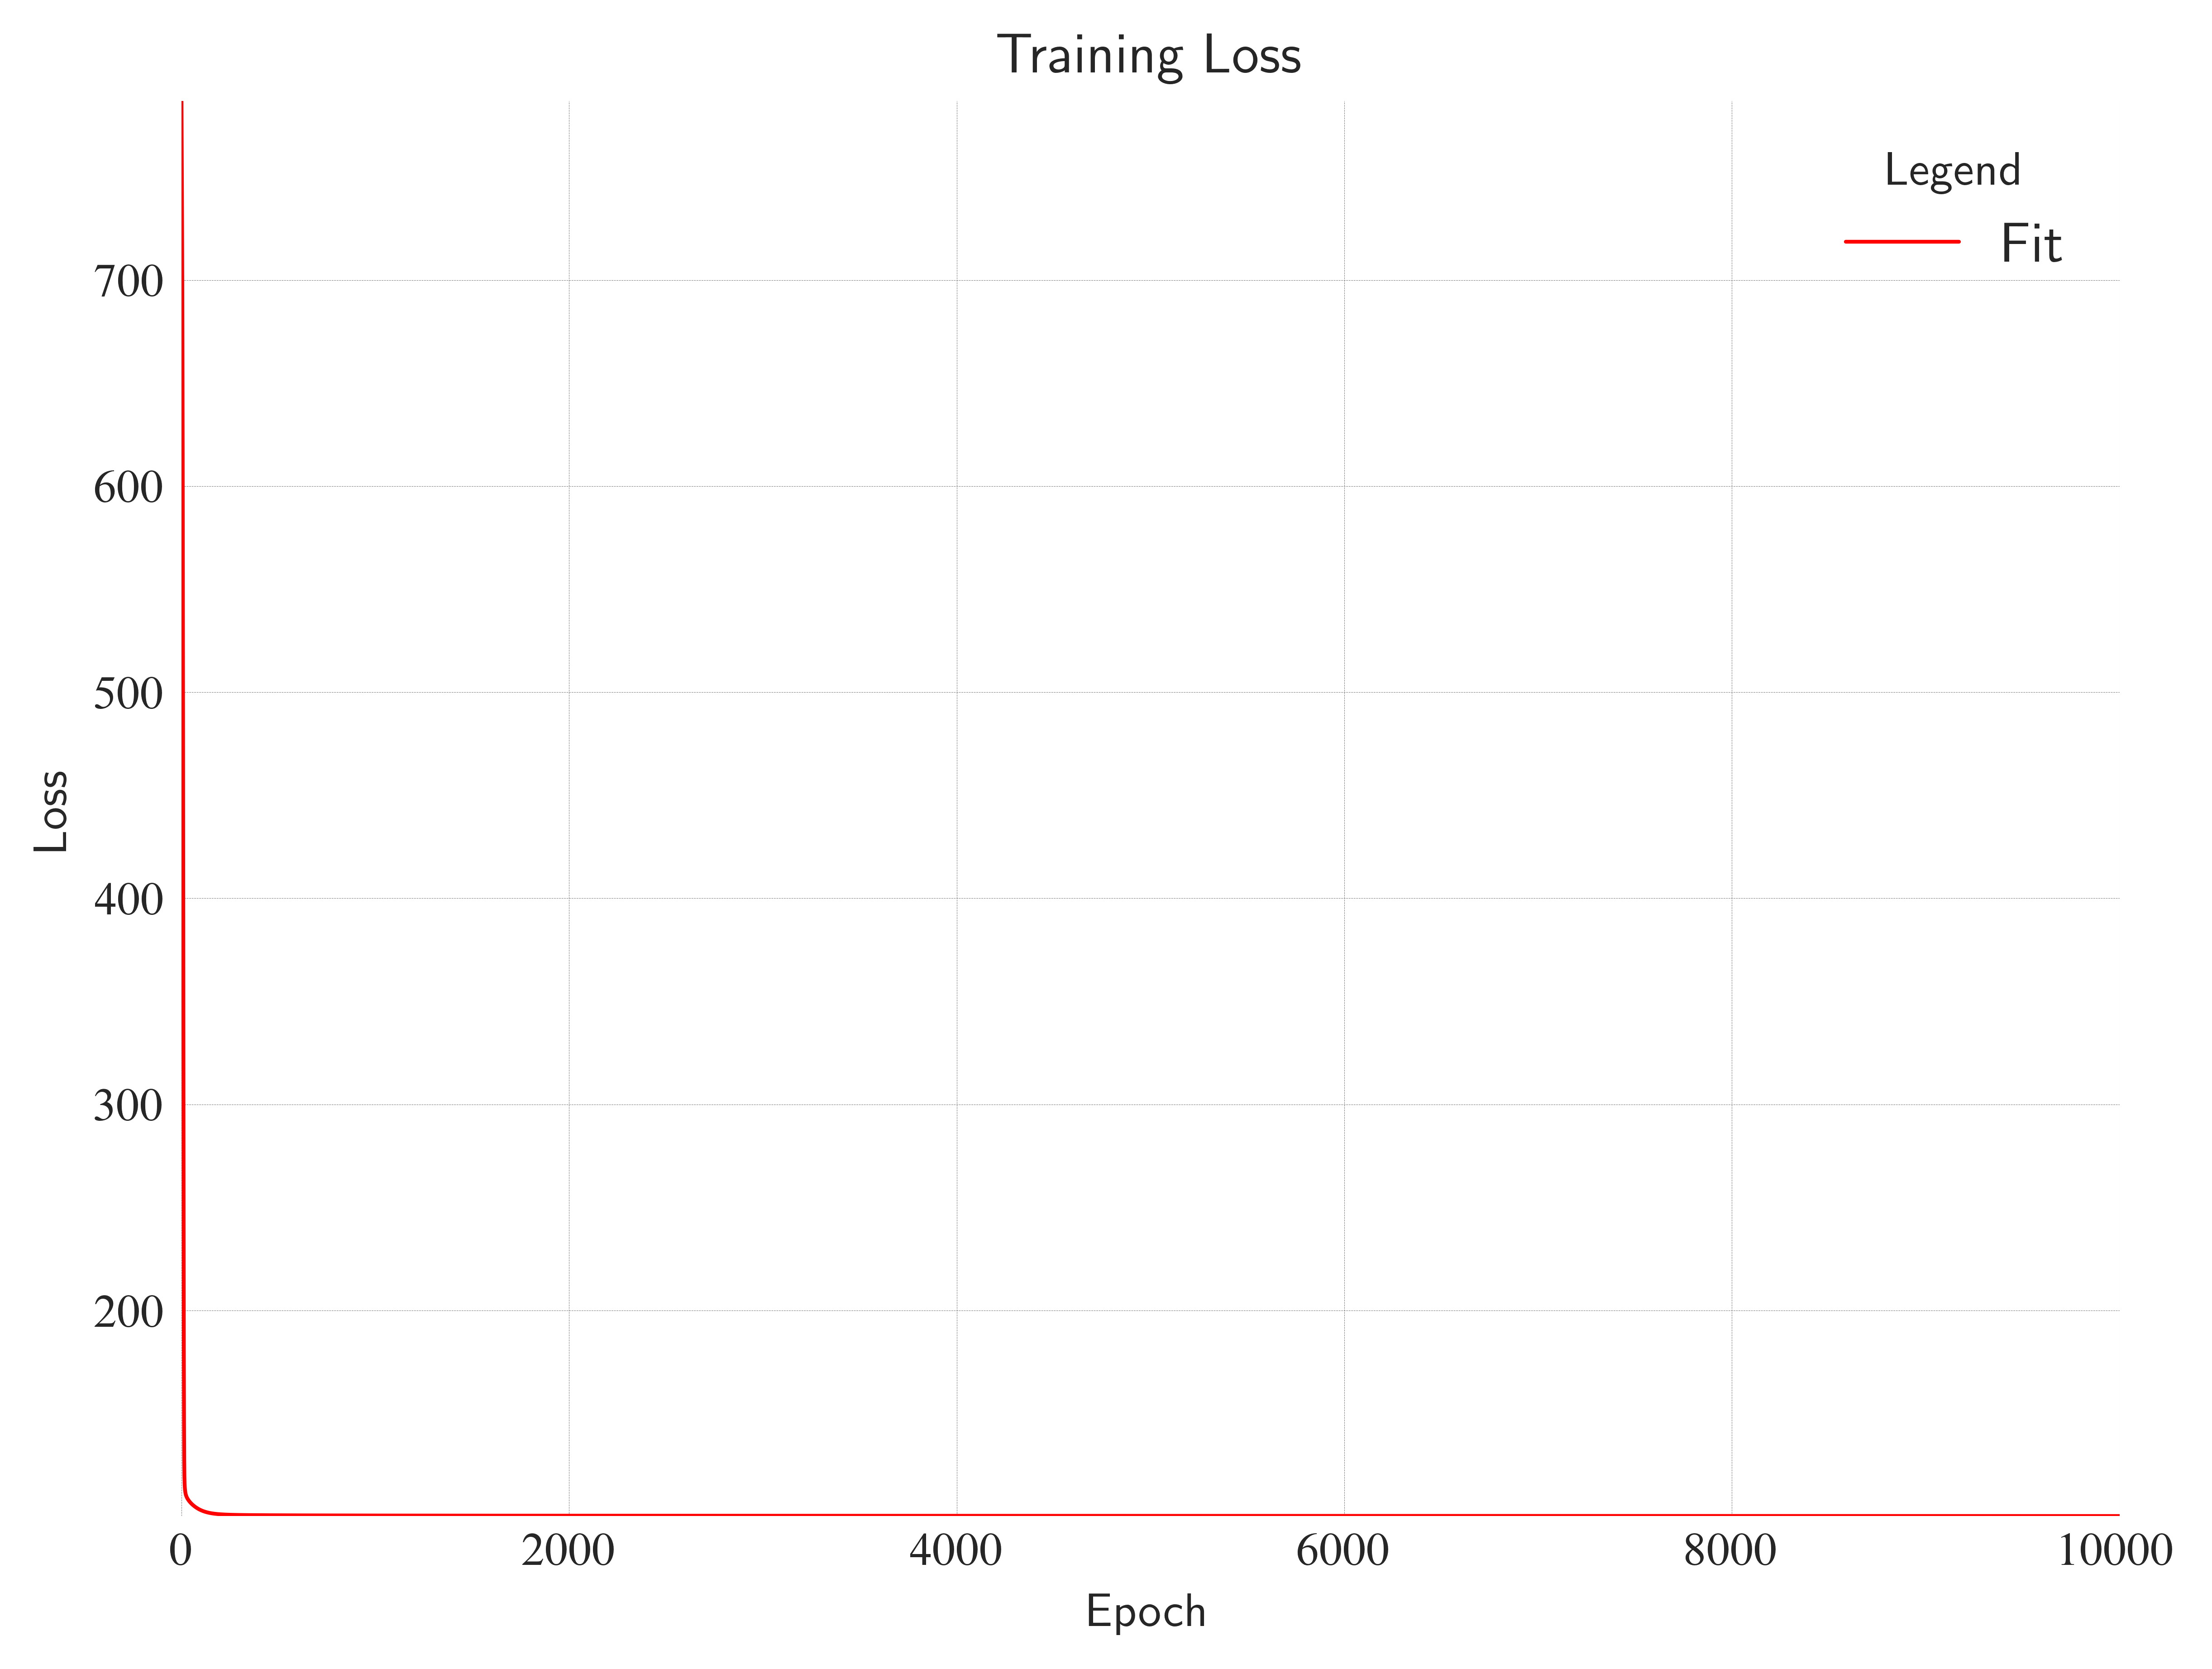

In [11]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min() - 8e-2, top=stack(losses).max() + 2e-1)
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    fig.savefig("trainingloss.pdf", transparent=True, bbox_inches="tight")
    plt.show()
    fig.clf()

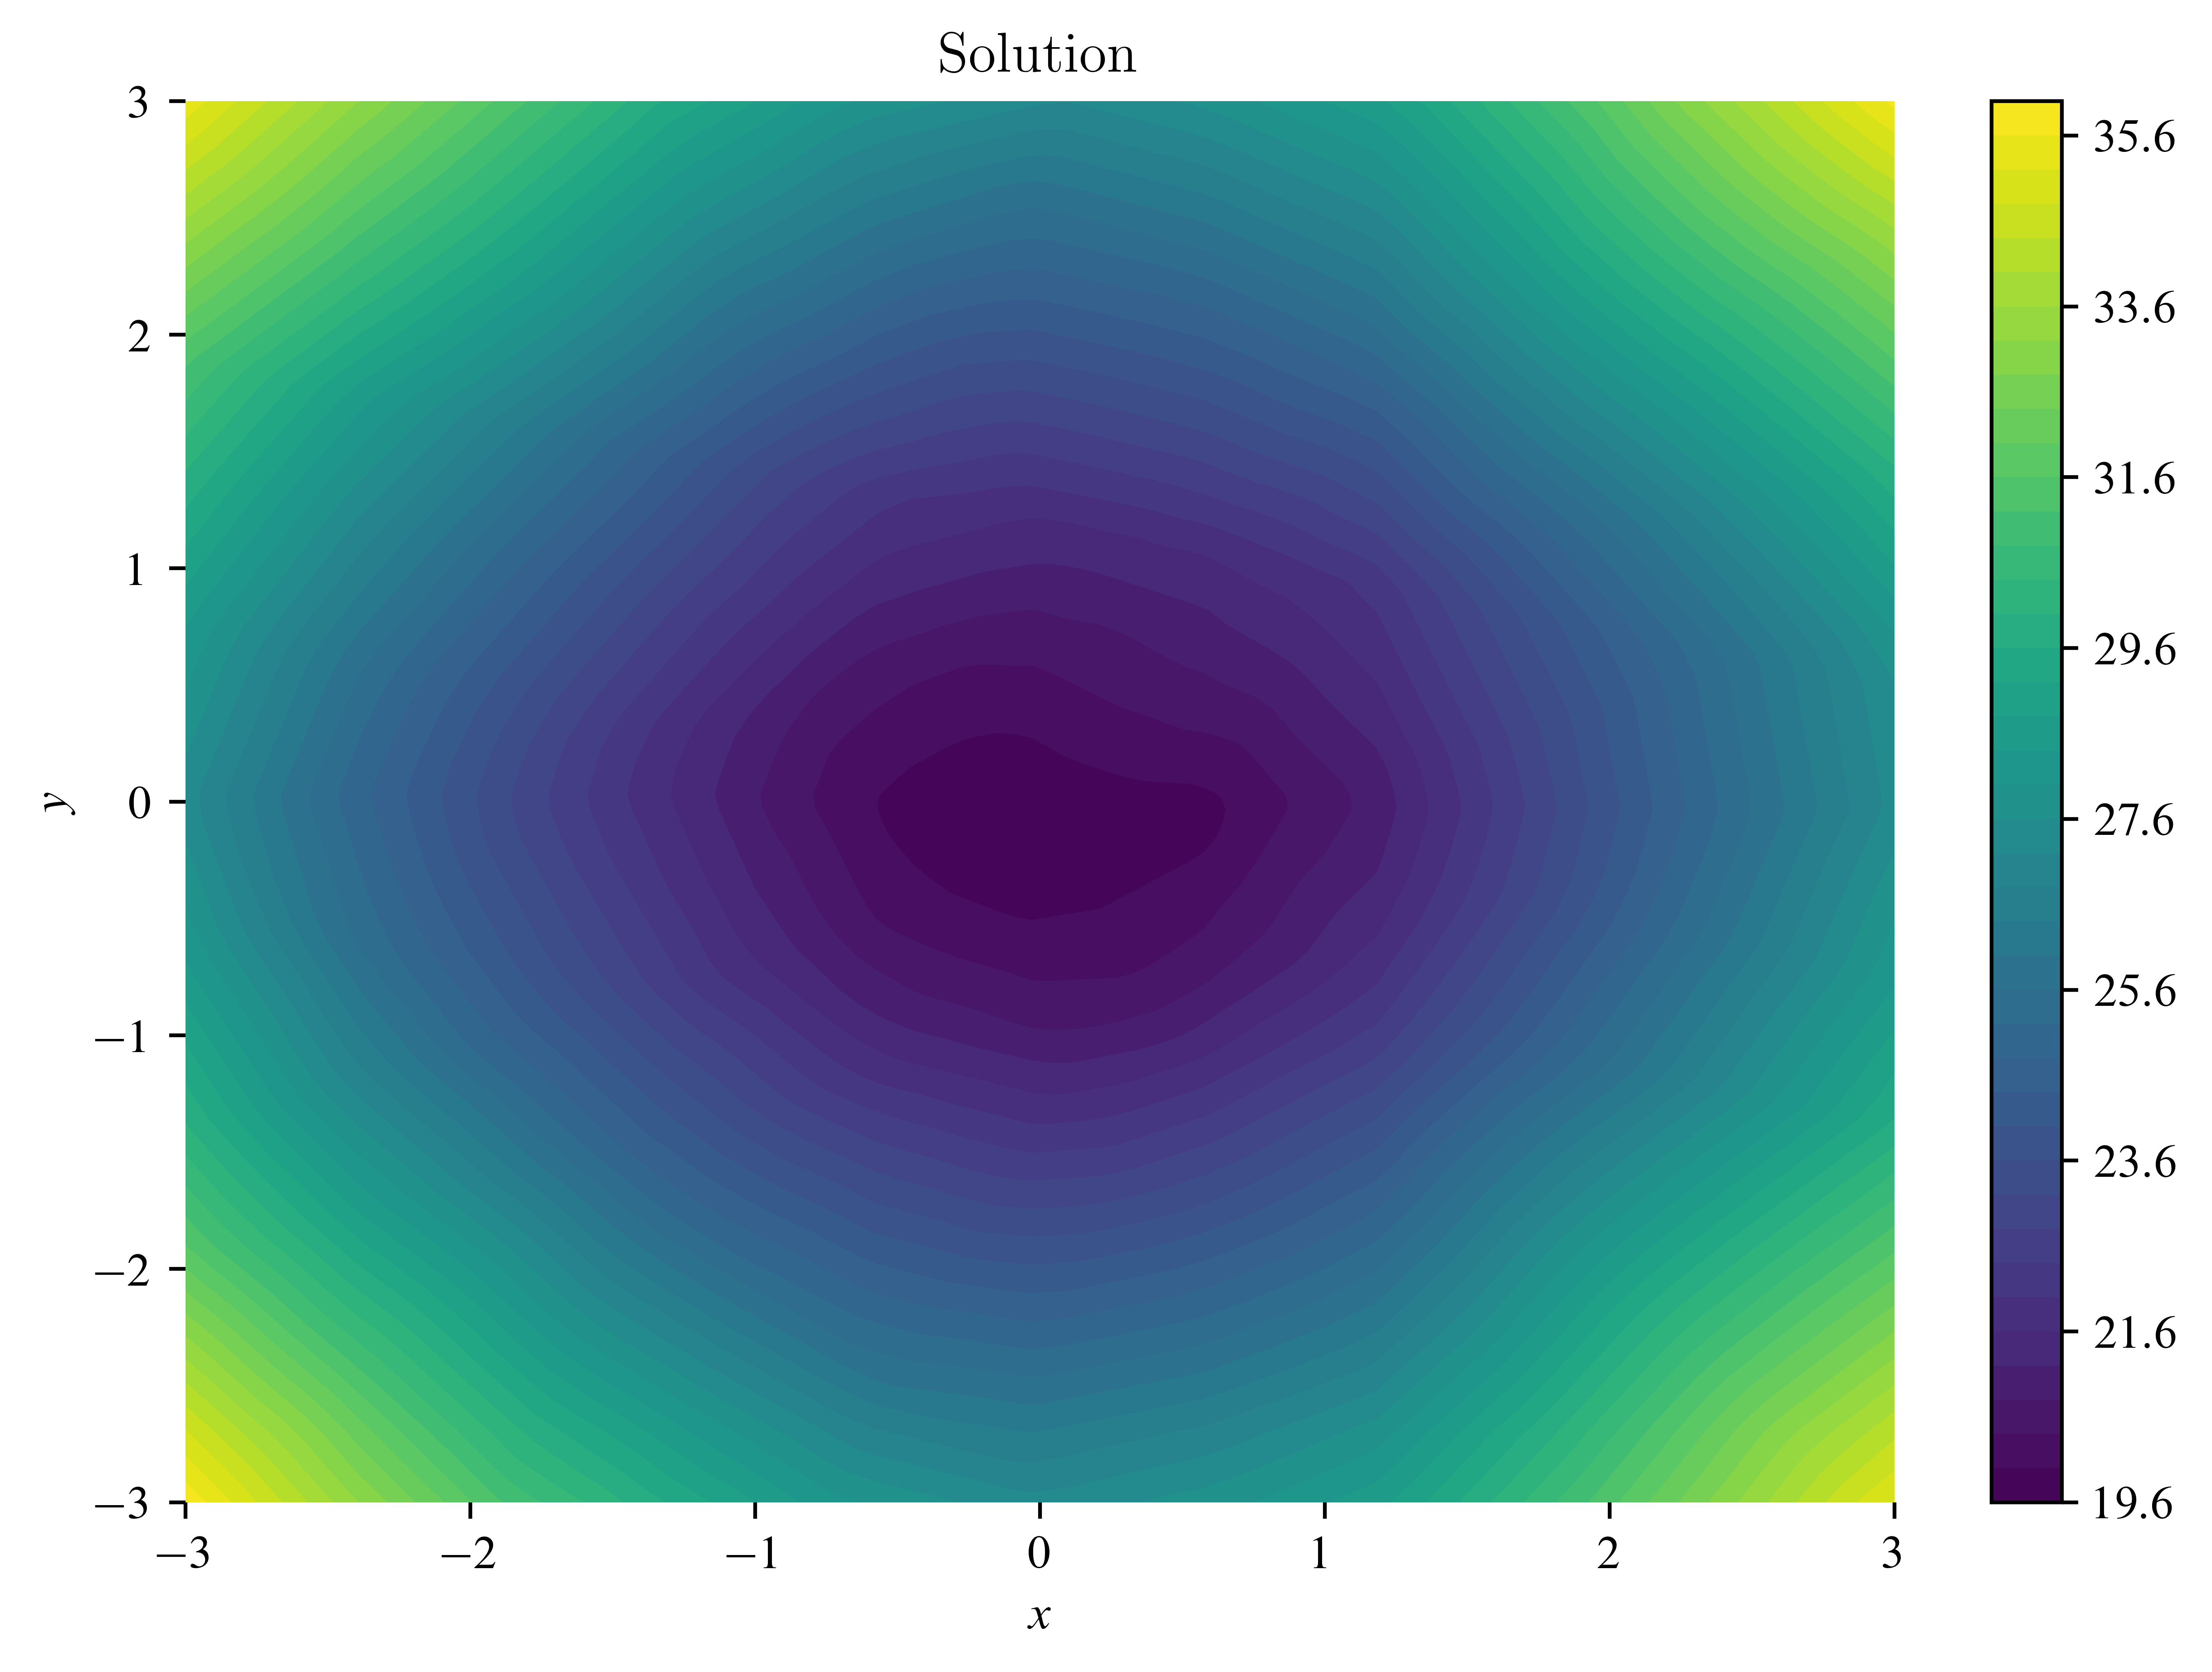

In [12]:
X, Y = meshgrid(
    linspace(start=-3, end=3, steps=100),
    linspace(start=-3, end=3, steps=100),
    indexing="xy",
)

with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        net(cat((X.reshape(-1, 1), Y.reshape(-1, 1)), dim=1)).reshape(X.shape).data,
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    fig.colorbar(mappable=img)
    fig.savefig("meshplot2.pdf", transparent=True, bbox_inches="tight")
    plt.show()
    fig.clf()

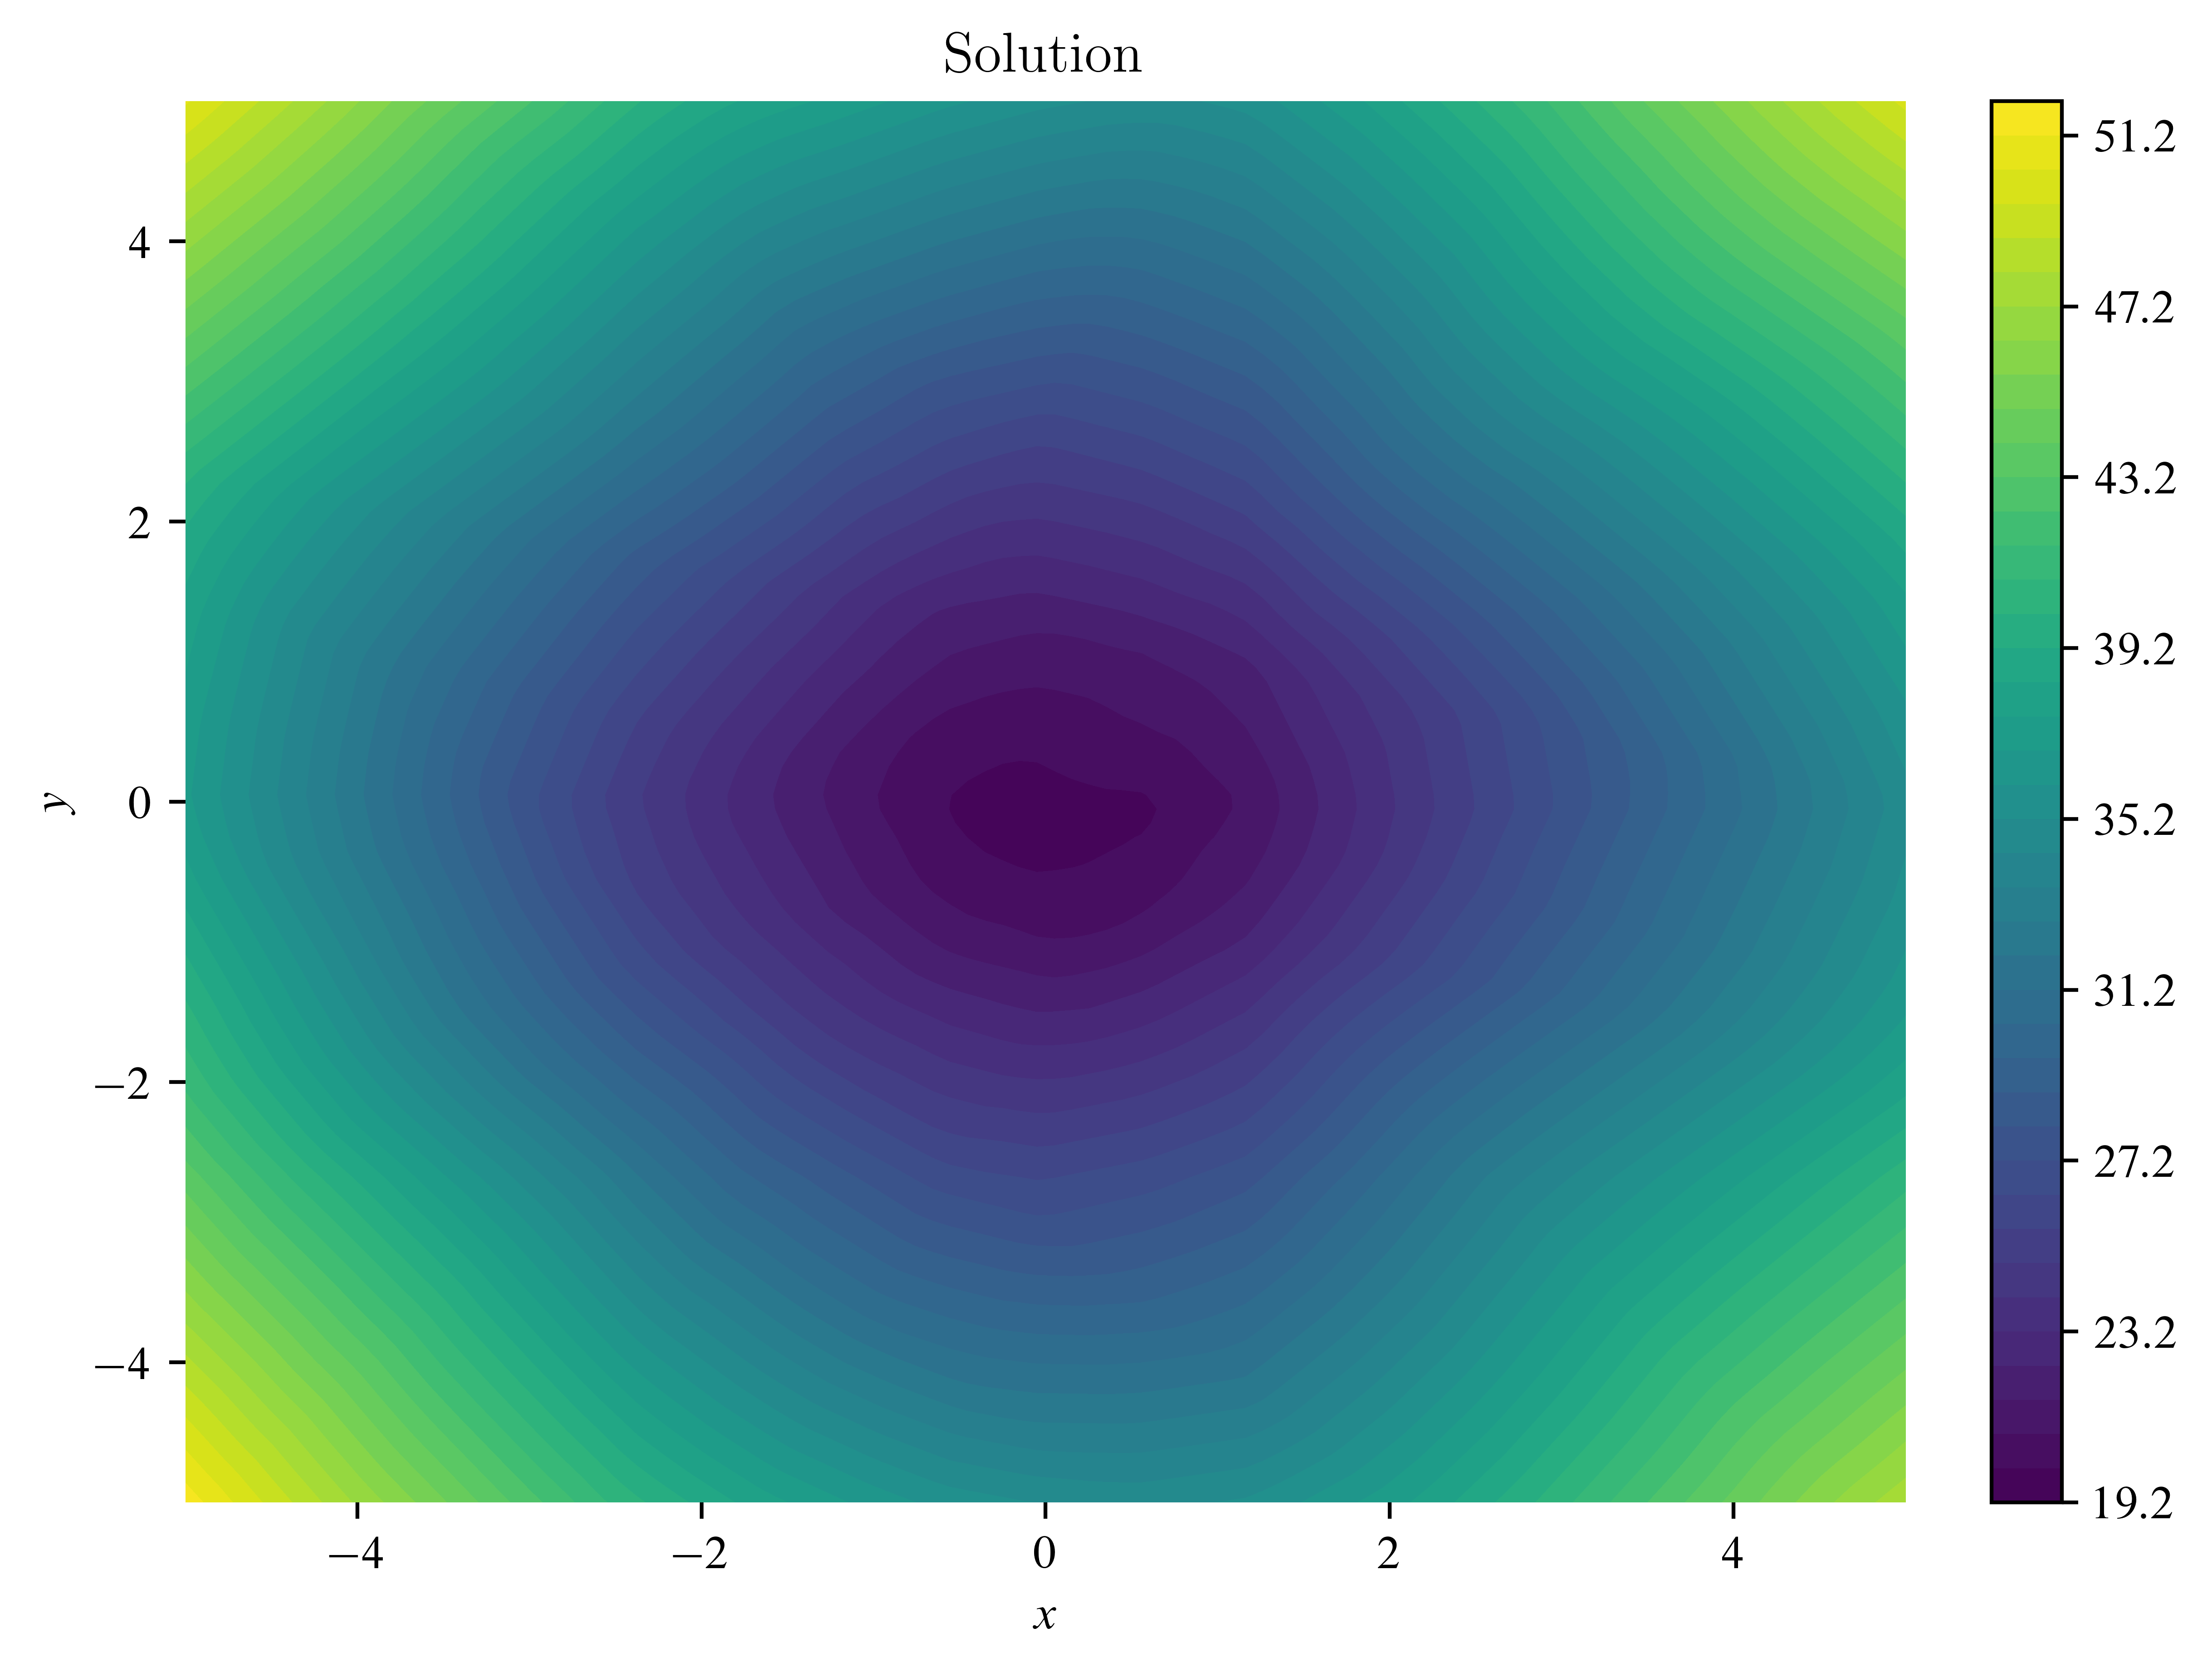

In [13]:
X, Y = meshgrid(
    linspace(start=-5, end=5, steps=100),
    linspace(start=-5, end=5, steps=100),
    indexing="xy",
)

with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        net(cat((X.reshape(-1, 1), Y.reshape(-1, 1)), dim=1)).reshape(X.shape).data,
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    fig.colorbar(mappable=img)
    fig.savefig("meshplot3.pdf", transparent=True, bbox_inches="tight")
    plt.show()
    fig.clf()

# Second

In [15]:
X = tensor(data=[[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float32)
y = tensor(data=[[0], [1], [1], [0]], dtype=float32)


class NetXOR(Module):
    def __init__(self):
        super().__init__()
        self.model = Sequential(
            Linear(2, 2), ReLU(), Linear(2, 1), Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [16]:
net = NetXOR()
optimizer = SGD(net.parameters(), lr=0.1)
lossFunction = MSELoss()
losses = []
for epoch in range(10000):
    yPred = net(X)
    loss = lossFunction(yPred, y)
    net.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.25576287508010864
Epoch 1000, Loss: 0.16883695125579834
Epoch 2000, Loss: 0.167246013879776
Epoch 3000, Loss: 0.16695953905582428
Epoch 4000, Loss: 0.16685760021209717
Epoch 5000, Loss: 0.1668086051940918
Epoch 6000, Loss: 0.1667816936969757
Epoch 7000, Loss: 0.1667579859495163
Epoch 8000, Loss: 0.16674380004405975
Epoch 9000, Loss: 0.16673120856285095


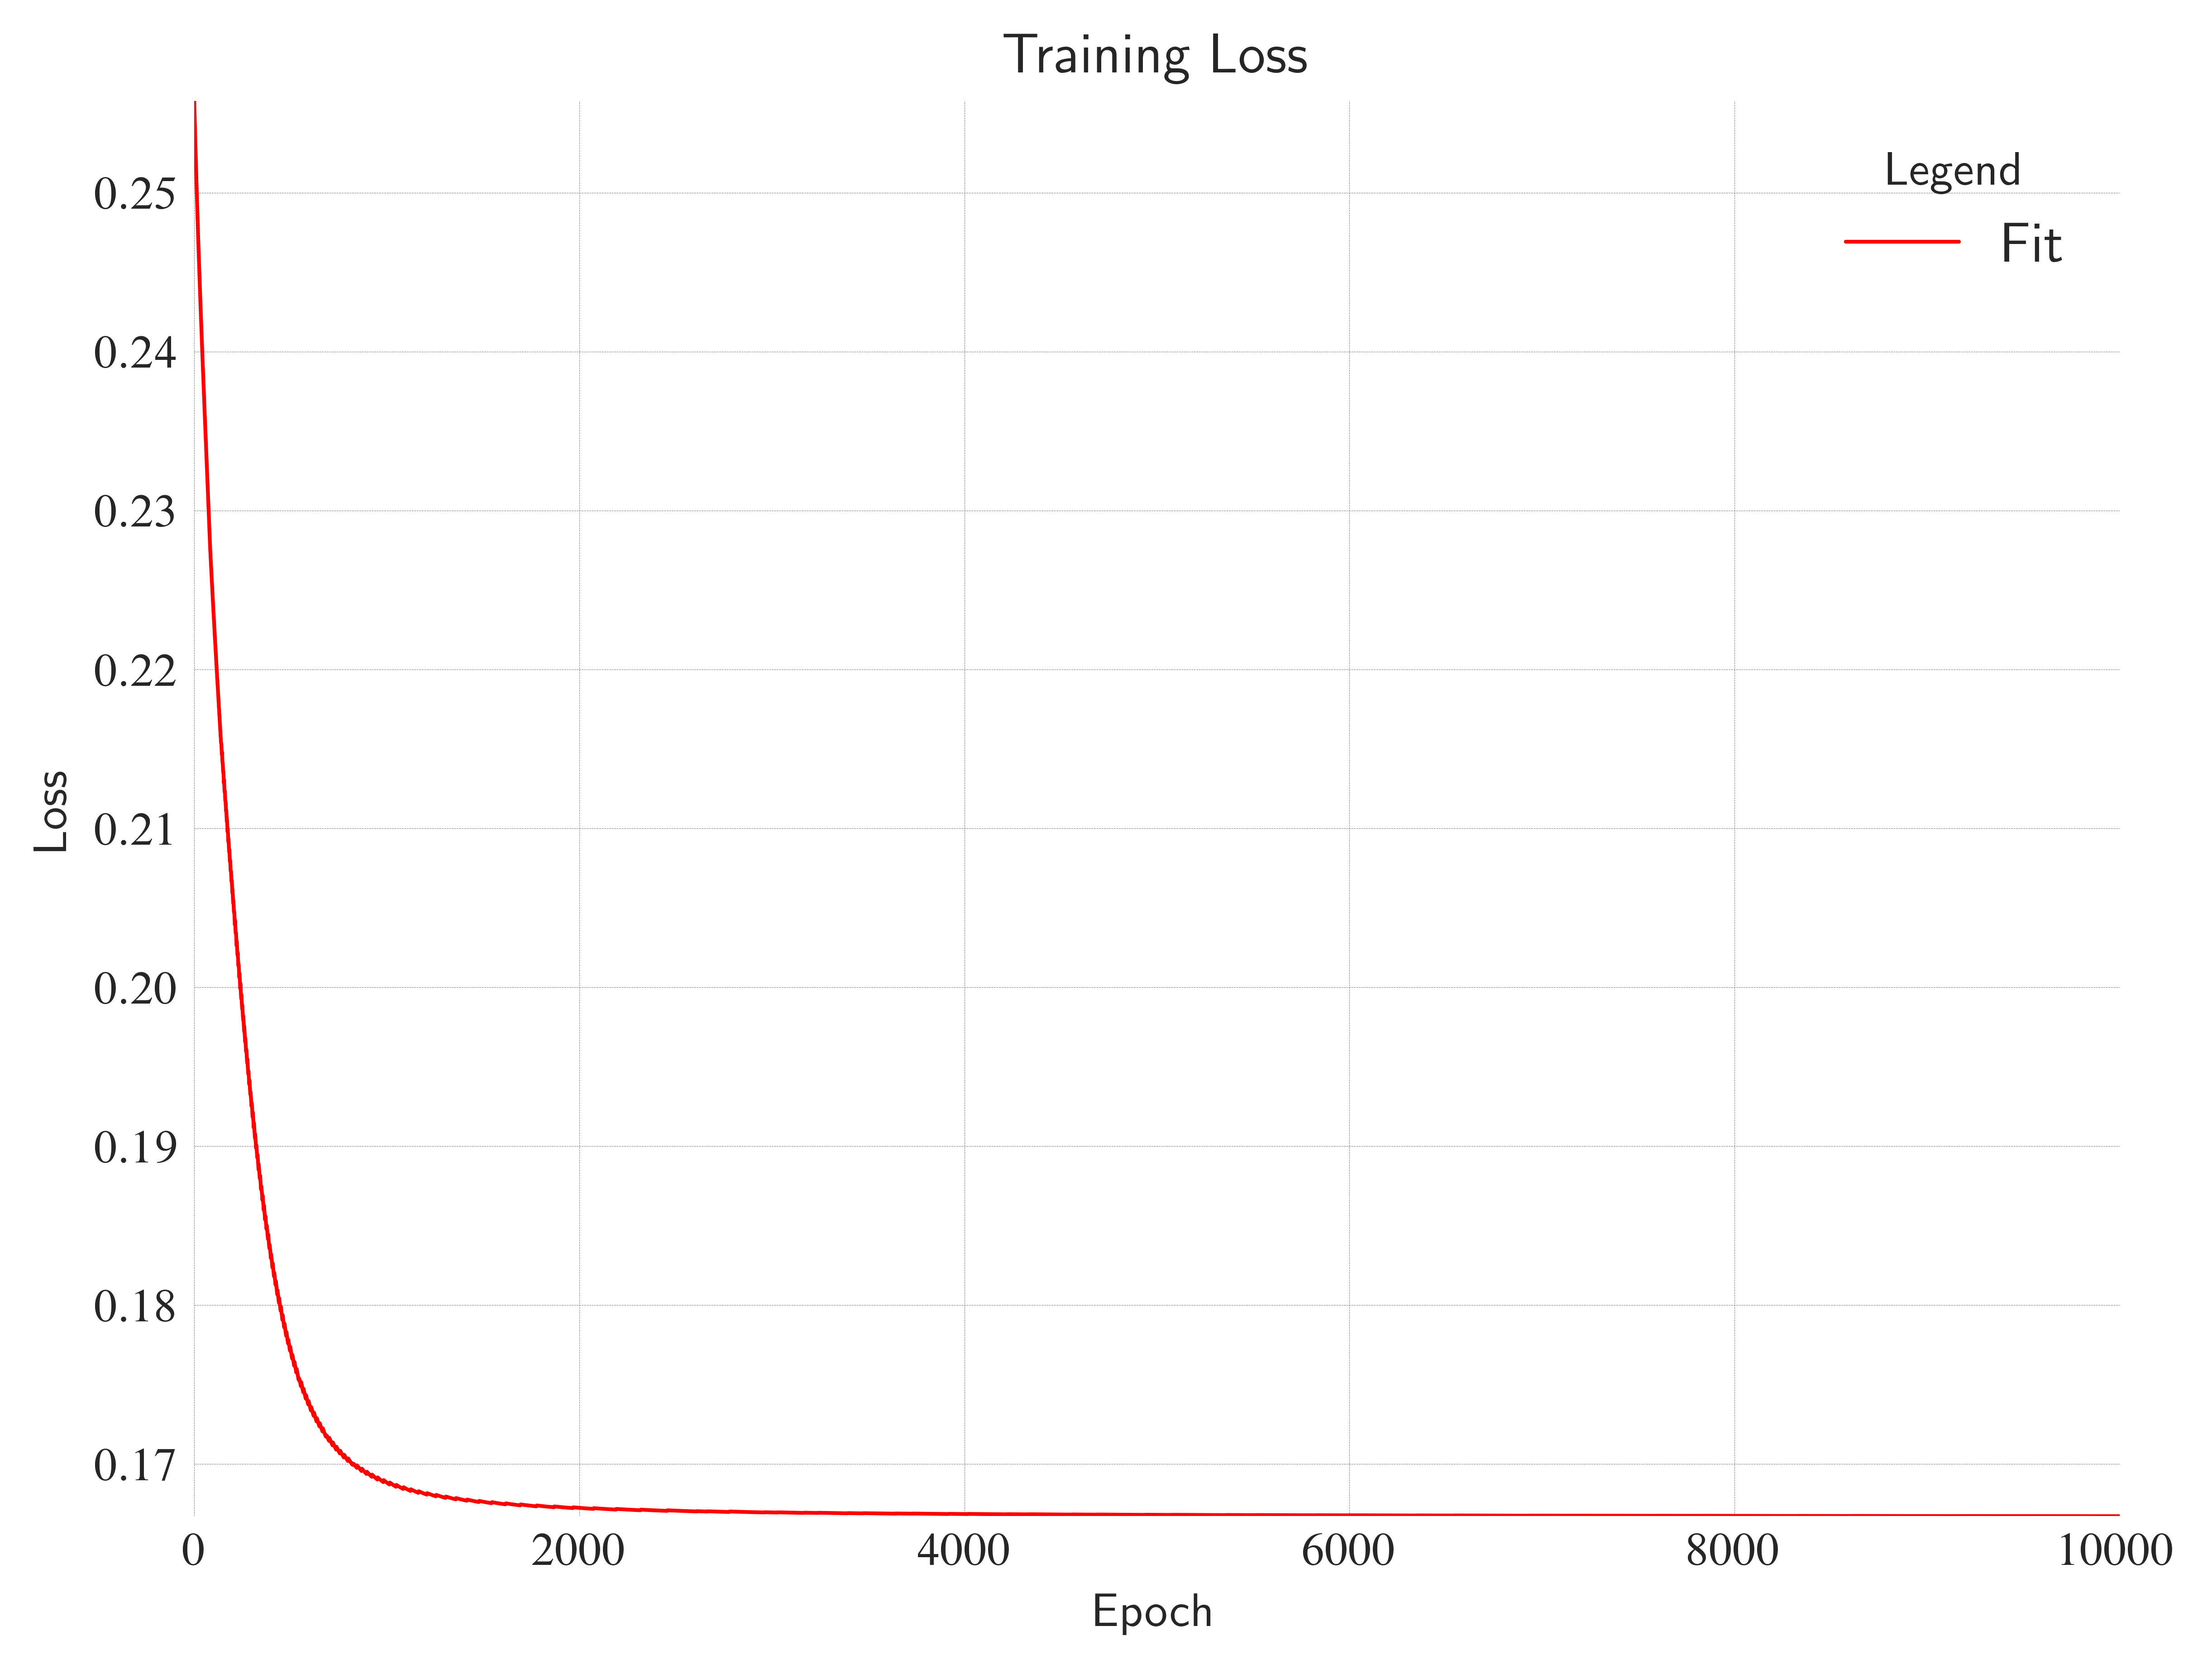

In [17]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    plt.show()
    fig.clf()

In [18]:
net(X)

tensor([[0.0150],
        [0.6663],
        [0.6663],
        [0.6663]], grad_fn=<SigmoidBackward0>)

# Third

In [19]:
data = read_csv(filepath_or_buffer="house_price_regression_dataset.csv")

In [20]:
data.describe()

Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e+05  
25%       0.000000              3.000000  4.016482e+05  
50%       1.000000              6.000000  6.282673e+05  
75%       2.000000              8.000000  8.271413e+05  
max       2.000000             10.000000  1.108237e+06

In [21]:
data.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06

In [22]:
X, y = data.drop(labels="House_Price", axis=1), data["House_Price"]
X_scaled = (X - X.mean()) / X.std()
y_scaled = (y - y.mean()) / y.std()
loader = DataLoader(
    dataset=list(zip(X_scaled.values, y_scaled.values)),
    batch_size=32,
    shuffle=True,
)

In [23]:
X.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality  
0            0                     5  
1            1                     6  
2            0                     9  
3            1                     8  
4            0                     8

In [24]:
X_scaled.head()

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0       -1.159223     -0.693489      -1.186106   -0.268988 -1.678439   
1        1.160144      0.007005       1.251933    1.427331  1.521629   
2        0.618533     -1.393983       0.032914    1.427331  0.660092   
3       -1.473039     -1.393983       0.032914   -0.462853 -0.036536   
4        1.681046     -0.693489      -1.186106    0.312607  1.480068   

   Garage_Size  Neighborhood_Quality  
0    -1.254030             -0.213020  
1    -0.026995              0.133354  
2    -1.254030              1.172473  
3    -0.026995              0.826100  
4    -1.254030              0.826100

In [25]:
class Net(Module):
    def __init__(self):
        super().__init__()
        self.model = Sequential(
            Linear(7, 64),
            ReLU(),
            Linear(64, 64),
            ReLU(),
            Linear(64, 64),
            ReLU(),
            Linear(64, 1),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [26]:
error = MSELoss()
net = Net()
optimizer = Adam(net.parameters(), lr=0.01)
losses = []
for i in range(1000):
    for x_batch, y_batch in loader:
        y_pred = net(x_batch.float())
        loss = error(y_pred.reshape(-1), y_batch.float())
        net.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data)

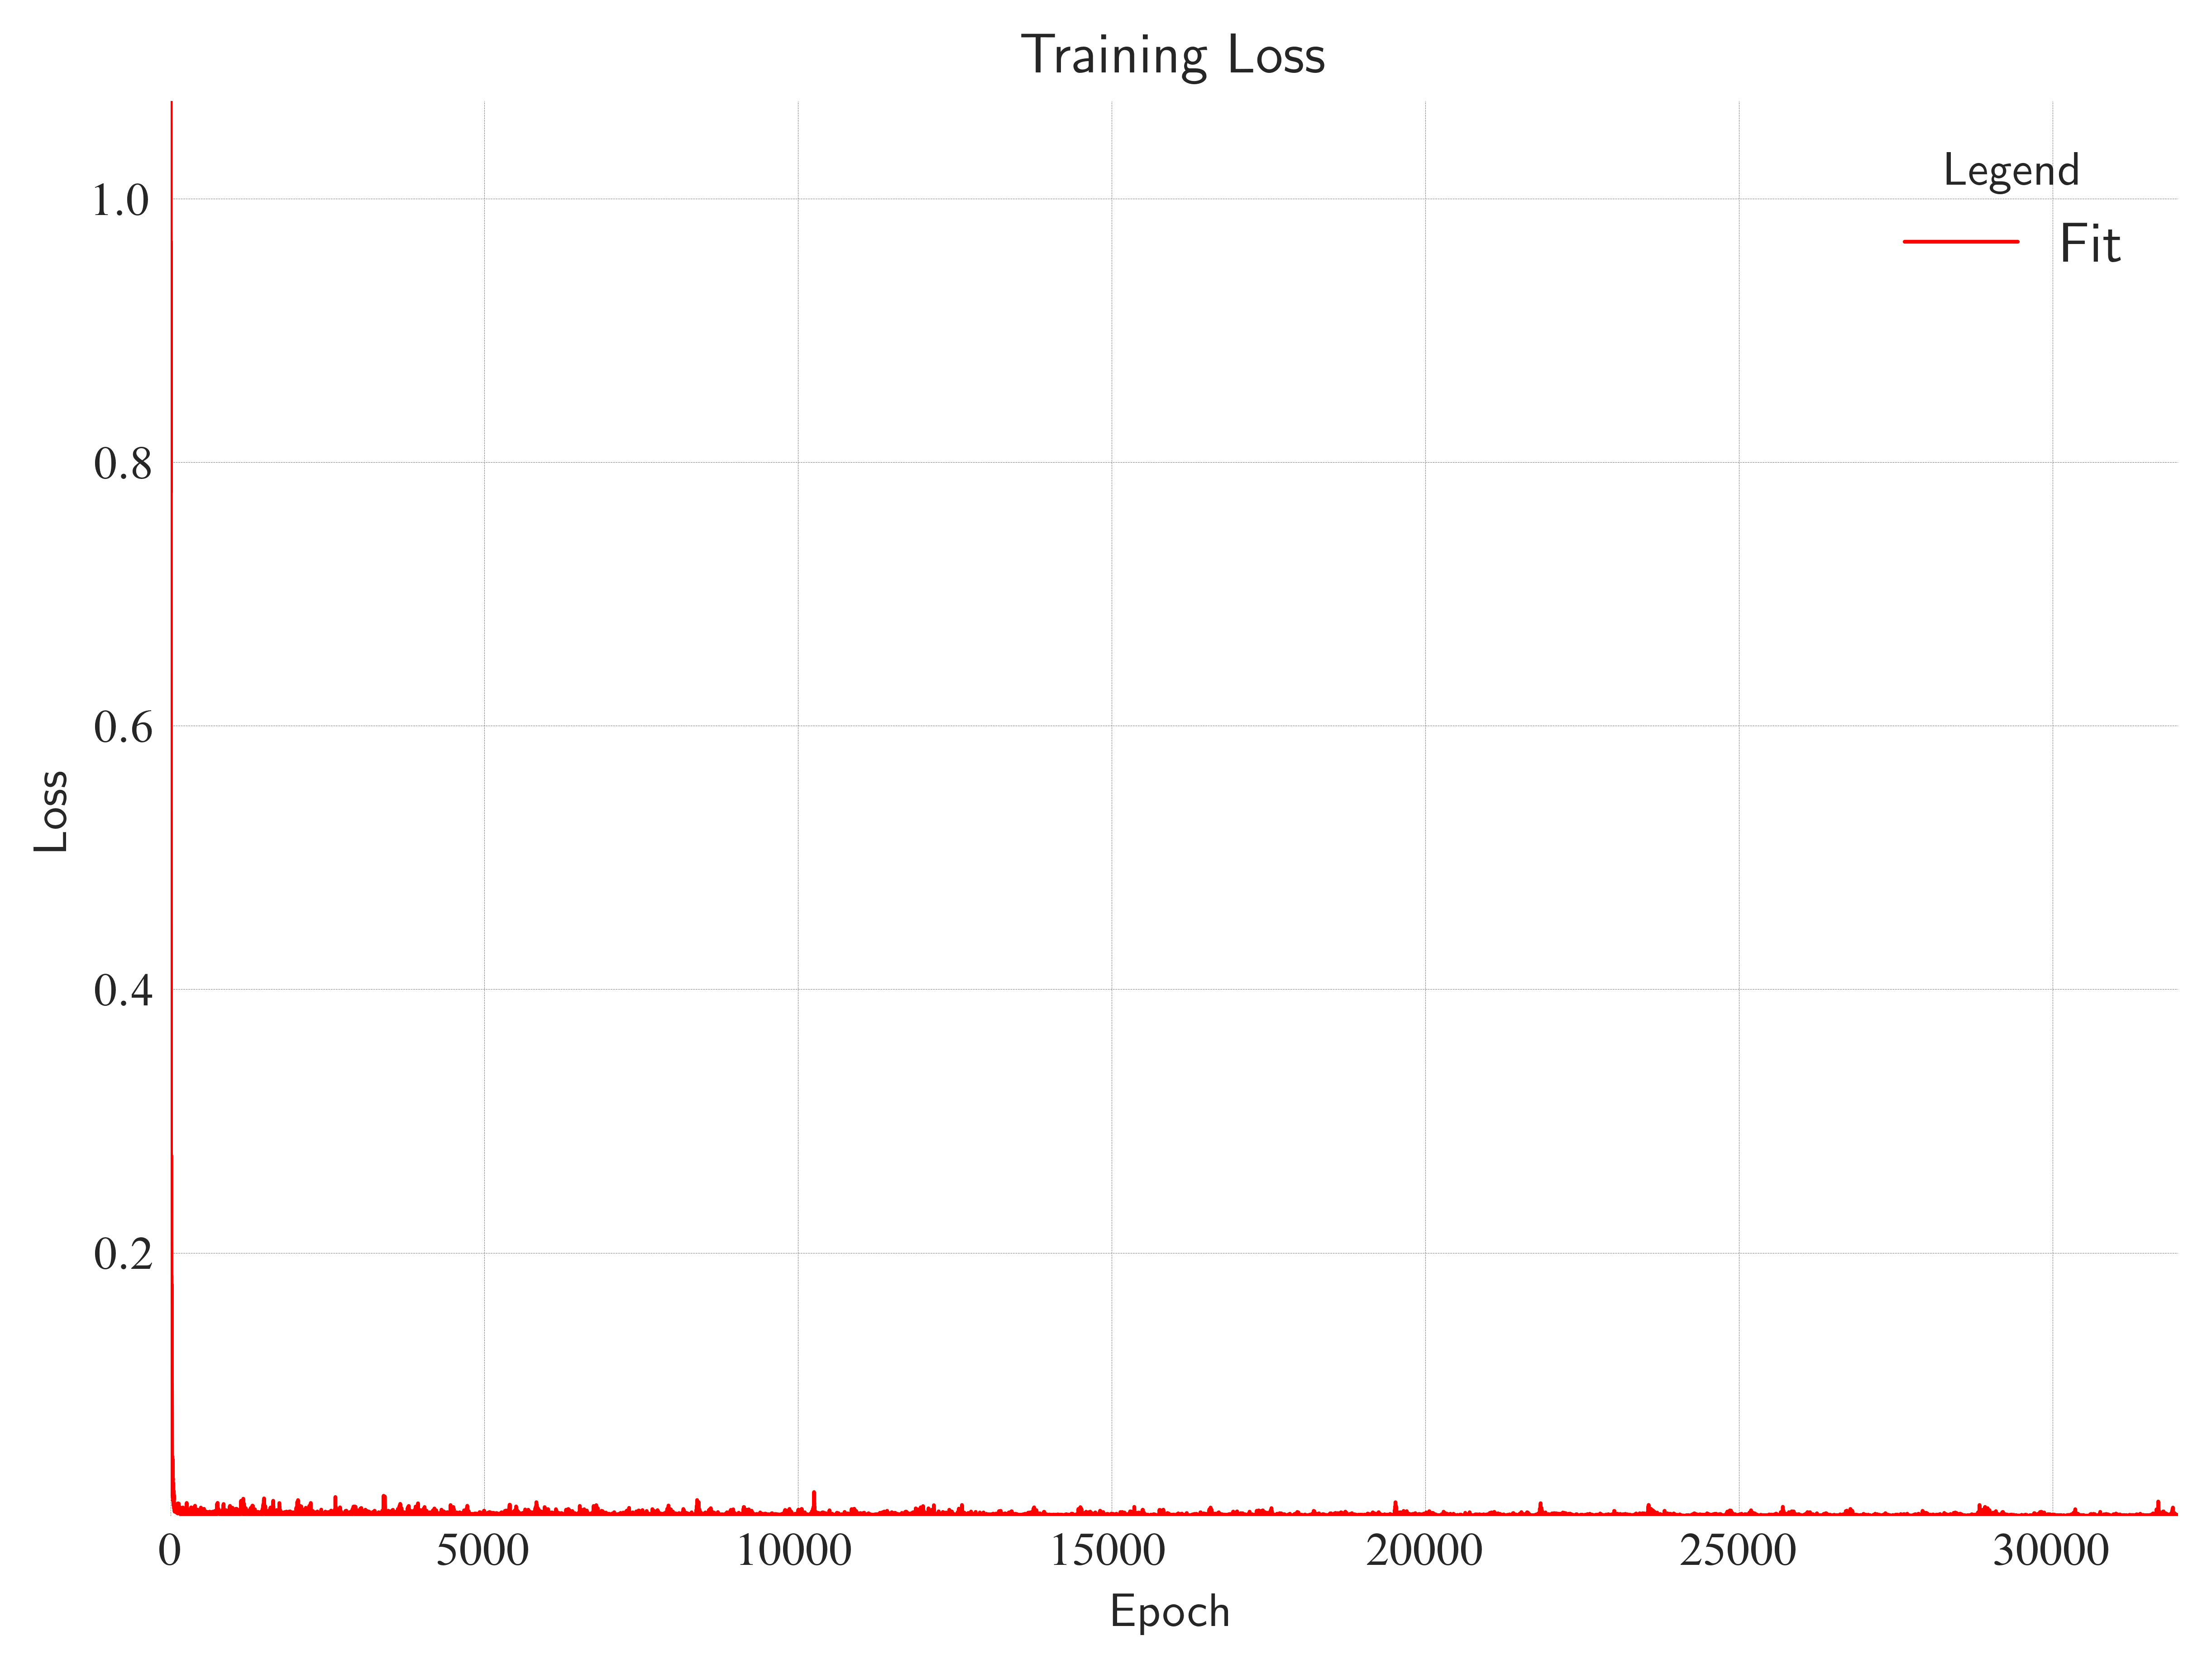

In [27]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    plt.show()
    fig.clf()

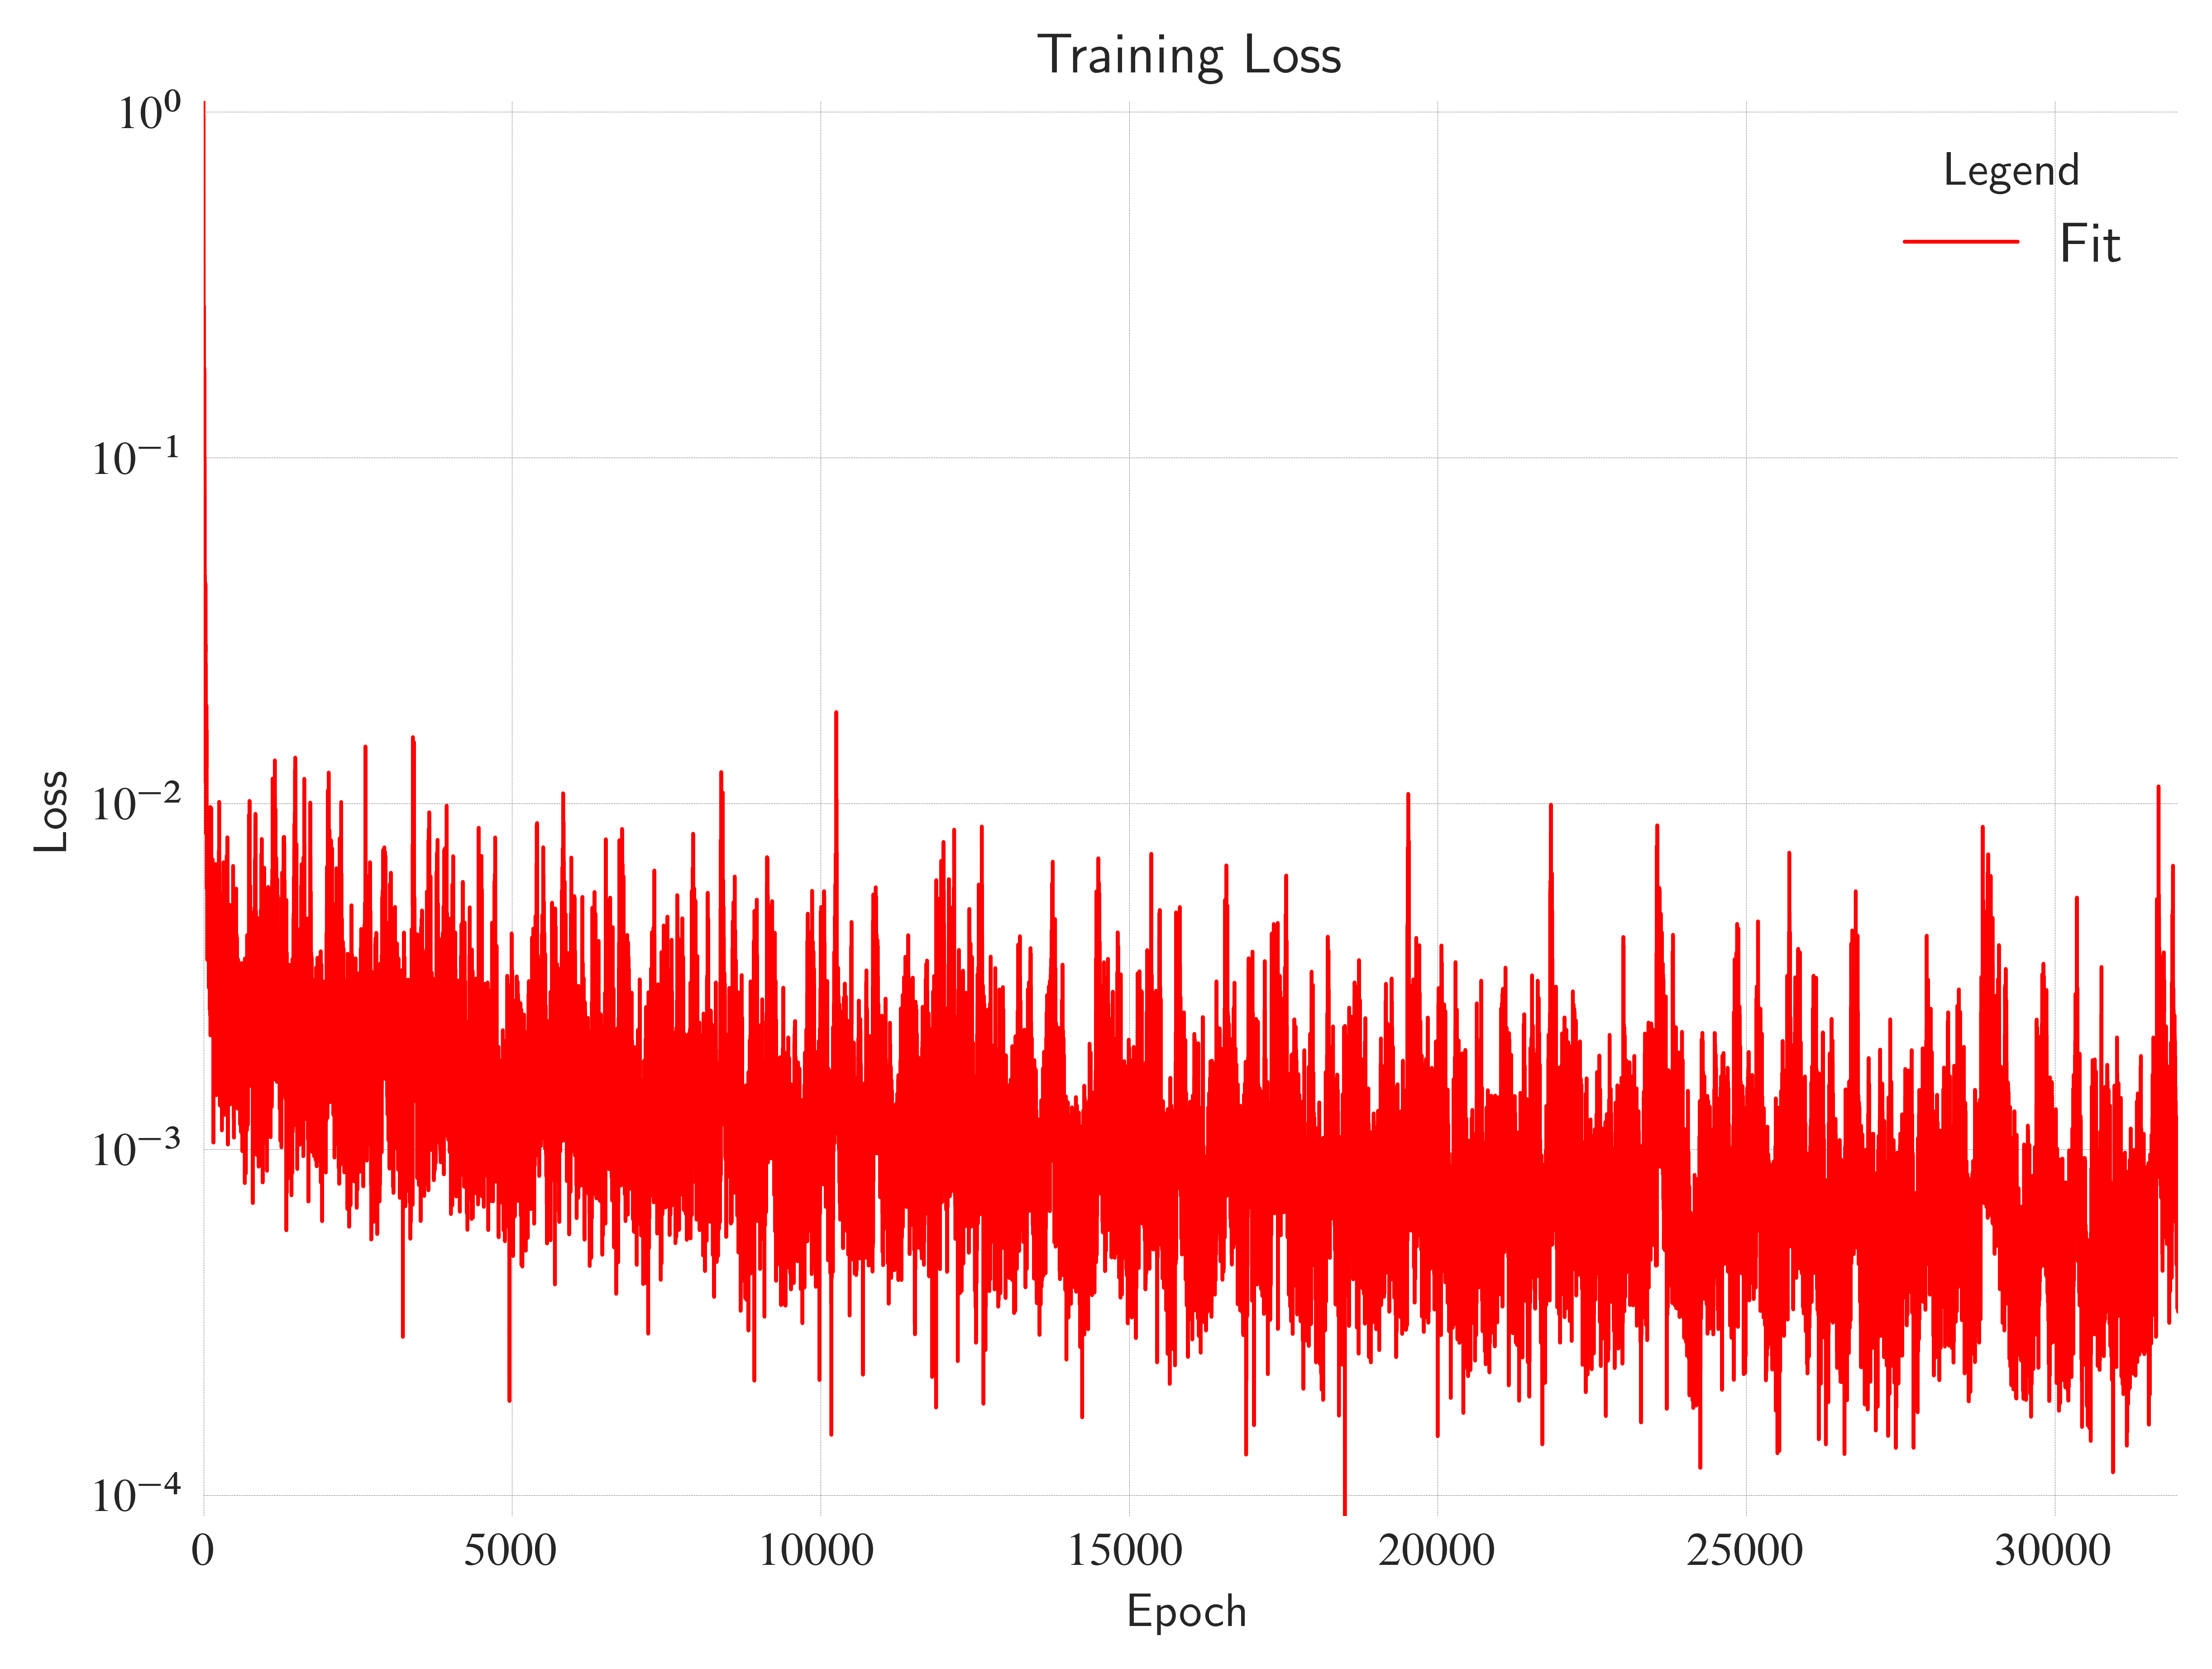

In [29]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.semilogy(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.spines["bottom"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    fig.savefig("training_loss.pdf", transparent=True, bbox_inches="tight")
    plt.show()
    fig.clf()